In [295]:
import pandas as pd
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt
import japanize_matplotlib # 追加

In [296]:
# スプレッドシートID（URLの一部）
SPREADSHEET_ID = "1BhziWFwpFQGM5cxG5tM829C3yduLeXWEErrdi9uB4tY"
#認証情報が格納されたファイル名
JSON_KEYFILE_NAME = "assets-463015-28cc88ee06aa.json"
# Google APIのスコープを設定
SCOPE = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

In [297]:
#接続まで
# 認証情報を読み込む
credentials = ServiceAccountCredentials.from_json_keyfile_name(JSON_KEYFILE_NAME, SCOPE)
# Googleスプレッドシートに接続
client = gspread.authorize(credentials)

In [298]:
# スプレッドシートを開く
spread_sheet = client.open_by_key(SPREADSHEET_ID)

In [299]:
spread_sheet

<Spreadsheet '資産' id:1BhziWFwpFQGM5cxG5tM829C3yduLeXWEErrdi9uB4tY>

In [300]:
sheet_name_list = \
["全体",
"税金",
"NISA運用",
"債券運用",
"株式運用",
"奨学金"]

In [301]:
# シート名で指定
work_sheet = spread_sheet.worksheet("税金")

In [302]:
# シート名で指定して、シート内の情報を取得
raw_data = spread_sheet.worksheet("税金").get_all_values()
data_df = pd.DataFrame(raw_data[1:], columns=raw_data[0])

In [303]:
data_df

,年度,月,所定外\n(前月),法定外\n(前月),基本給/\n賞与,時間外/\n休日/深夜,通勤手当,持株奨励金,その他,健康保険料,...,雇用保険料,所得税,住民税,食事代,清交会,持株拠出金,社宅,組合費,手取り,Check
0,2024,4,0.00,0.00,"¥255,000",¥0,"¥36,720",¥0,¥0,¥0,...,"¥1,750","¥6,670",¥0,¥0,¥510,¥0,"¥6,935",¥0,"¥275,855",OK
1,,5,0.00,0.00,"¥255,000","¥22,450",¥0,¥0,"¥5,160","¥8,680",...,"¥1,664","¥6,250",¥0,"¥3,132",¥510,¥0,"¥6,935","¥1,280","¥228,539",OK
2,,6,13.80,0.00,"¥273,000","¥33,176",¥0,"¥1,000","¥40,020","¥8,680",...,"¥2,062",¥0,¥0,"¥8,562",¥546,"¥11,000","¥3,065","¥1,280","¥286,381",OK
3,,7,12.52,0.00,"¥273,000","¥30,091",¥0,"¥1,000",¥0,"¥8,680",...,"¥1,818",¥0,¥0,"¥2,190",¥546,"¥11,000","¥5,000","¥1,370","¥247,867",OK
4,,8,24.45,2.45,"¥273,000","¥58,778",¥0,"¥1,000",¥0,"¥8,680",...,"¥1,990","¥8,105",¥0,"¥4,965",¥546,"¥11,000","¥5,000","¥1,370","¥265,502",OK
5,,9,32.78,13.78,"¥273,000","¥78,812",¥0,"¥1,000",¥0,"¥8,680",...,"¥2,110","¥9,720",¥0,"¥6,059",¥546,"¥11,000","¥5,000","¥1,370","¥282,707",OK
6,,10,24.15,9.15,"¥273,000","¥58,057","¥36,720","¥1,000",¥0,"¥10,540",...,"¥2,206","¥7,920",¥0,"¥5,497",¥546,"¥11,000","¥5,000","¥1,370","¥293,588",OK
7,,11,33.02,11.02,"¥273,000","¥79,373",¥0,"¥1,000","¥13,126","¥10,540",...,"¥2,114","¥9,170",¥0,"¥10,909",¥546,"¥11,000","¥5,000","¥1,370","¥284,740",OK
8,,12,20.77,0.77,"¥273,000","¥49,965",¥0,"¥1,000",¥0,"¥10,540",...,"¥1,937","¥7,640",¥0,"¥10,836",¥546,"¥11,000","¥5,000","¥1,370","¥243,986",OK
9,,1,32.40,11.40,"¥273,000","¥78,452",¥0,"¥1,000",¥0,"¥10,540",...,"¥2,108","¥9,090",¥0,"¥9,548",¥546,"¥11,000","¥5,000","¥1,370","¥272,140",OK


In [304]:
dict_on_a_yearly_basis[FY].index.to_list()

['所定外\n(前月)',
 '法定外\n(前月)',
 '基本給',
 '時間外/\n休日/深夜',
 '賞与',
 '通勤手当',
 '持株奨励金',
 'その他',
 '健康保険料',
 '厚生年金\n保険料',
 '雇用保険料',
 '所得税',
 '住民税',
 '食事代',
 '清交会',
 '持株拠出金',
 '社宅',
 '組合費',
 '手取り']

In [305]:
SORTED_INDEX = ['所定外\n(前月)', 
                '法定外\n(前月)',
                '基本給', 
                '時間外/\n休日/深夜',
                '賞与',
                '通勤手当', 
                '持株奨励金', 
                'その他', 
                '健康保険料',
                '厚生年金\n保険料', 
                '雇用保険料',
                '所得税', 
                '住民税',
                '食事代', 
                '清交会',
                '持株拠出金', 
                '社宅',
                '組合費',
                '手取り']

In [306]:
FY = -1
dict_on_a_monthly_basis = {}
dict_on_a_bonus_basis = {}
dict_on_a_yearly_basis = {}
dict_non_legal_overtime = {}
dict_legal_overtime = {}
master_key = []
for index, row in data_df.iterrows():
    #現在の年度を格納
    if(row["年度"].isdigit()):
        FY = int(row["年度"])
        master_key.append(FY)
        dict_on_a_monthly_basis[FY] = {}
        dict_on_a_bonus_basis[FY] = {}
        dict_on_a_yearly_basis[FY] = {}
        dict_non_legal_overtime[FY] = {}
        dict_legal_overtime[FY] = {}
    if(row["月"].isdigit()):
        if(float(row["手取り"].replace(",", "").replace("¥", "")) != 0.0):
            dict_on_a_monthly_basis[FY][row["月"]] = row[2:20].apply(lambda x: float(x.replace(",", "").replace("¥", "")))
            dict_non_legal_overtime[FY][row["月"]] = float(row["所定外\n(前月)"].replace(",", "").replace("¥", ""))
            dict_legal_overtime[FY][row["月"]] = float(row["法定外\n(前月)"].replace(",", "").replace("¥", ""))
    else:
        real_income = float(row["手取り"].replace(",", "").replace("¥", ""))
        if("夏" in row["月"] and real_income != 0.0):
            dict_on_a_bonus_basis[FY]["6"] = real_income
        elif("冬" in row["月"] and real_income != 0.0):
            dict_on_a_bonus_basis[FY]["12"] = real_income
        elif("合計" in row["月"] and real_income != 0.0):
            #先頭の年度と月列を除外して、各値を変換
            dict_on_a_yearly_basis[FY] = row[2:20].apply(lambda x: float(x.replace(",", "").replace("¥", "")))
            #ボーナスを基本給/\n賞与から引いて、新しく賞与indexを追加
            sum_bonus = 0
            for k, v in dict_on_a_bonus_basis[FY].items():
                dict_on_a_yearly_basis[FY]
                sum_bonus += v
            dict_on_a_yearly_basis[FY]["基本給/\n賞与"] -= sum_bonus
            dict_on_a_yearly_basis[FY].rename({"基本給/\n賞与":"基本給"}, inplace=True)
            dict_on_a_yearly_basis[FY]["賞与"] = sum_bonus
            #インデックスの順序を変更
            dict_on_a_yearly_basis[FY] = dict_on_a_yearly_basis[FY].reindex(index=SORTED_INDEX)
            #print(dict_on_a_yearly_basis[2024])

In [307]:
dict_on_a_yearly_basis

{2024: 所定外\n(前月)          252.41
 法定外\n(前月)           60.56
 基本給            3553803.00
 時間外/\n休日/深夜     580748.00
 賞与             1387697.00
 通勤手当             73440.00
 持株奨励金            10000.00
 その他             108306.00
 健康保険料           159371.00
 厚生年金\n保険料       470391.00
 雇用保険料            33791.00
 所得税             175498.00
 住民税                  0.00
 食事代              79022.00
 清交会               6480.00
 持株拠出金           110000.00
 社宅               61935.00
 組合費              16260.00
 手取り            4601246.00
 Name: 14, dtype: float64,
 2025: 所定外\n(前月)          241.98
 法定外\n(前月)          162.98
 基本給            1488272.00
 時間外/\n休日/深夜     504319.00
 賞与             1122828.00
 通勤手当             36720.00
 持株奨励金             4000.00
 その他             406628.00
 健康保険料            92367.00
 厚生年金\n保険料       256108.00
 雇用保険料            17869.00
 所得税             202502.00
 住民税              38500.00
 食事代              38325.00
 清交会               2344.00
 持株拠出金            44000.00
 社宅             

In [309]:
yearly_label_revenue = [e.replace("\n", "").replace("/", "") for e in dict_on_a_yearly_basis[2024].index.tolist()[2:8]]
yearly_data_revenue = [e for e in dict_on_a_yearly_basis[2024].values.tolist()[2:8]]
print(yearly_label_revenue)
yearly_label_expenditure = [e.replace("\n", "").replace("/", "") for e in dict_on_a_yearly_basis[2024].index.tolist()[8:19]]
yearly_data_expenditure = [e for e in dict_on_a_yearly_basis[2024].values.tolist()[8:19]]
print(yearly_label_expenditure)

['基本給', '時間外休日深夜', '賞与', '通勤手当', '持株奨励金', 'その他']
['健康保険料', '厚生年金保険料', '雇用保険料', '所得税', '住民税', '食事代', '清交会', '持株拠出金', '社宅', '組合費', '手取り']


Text(0.5, 1.0, 'Expenditure')

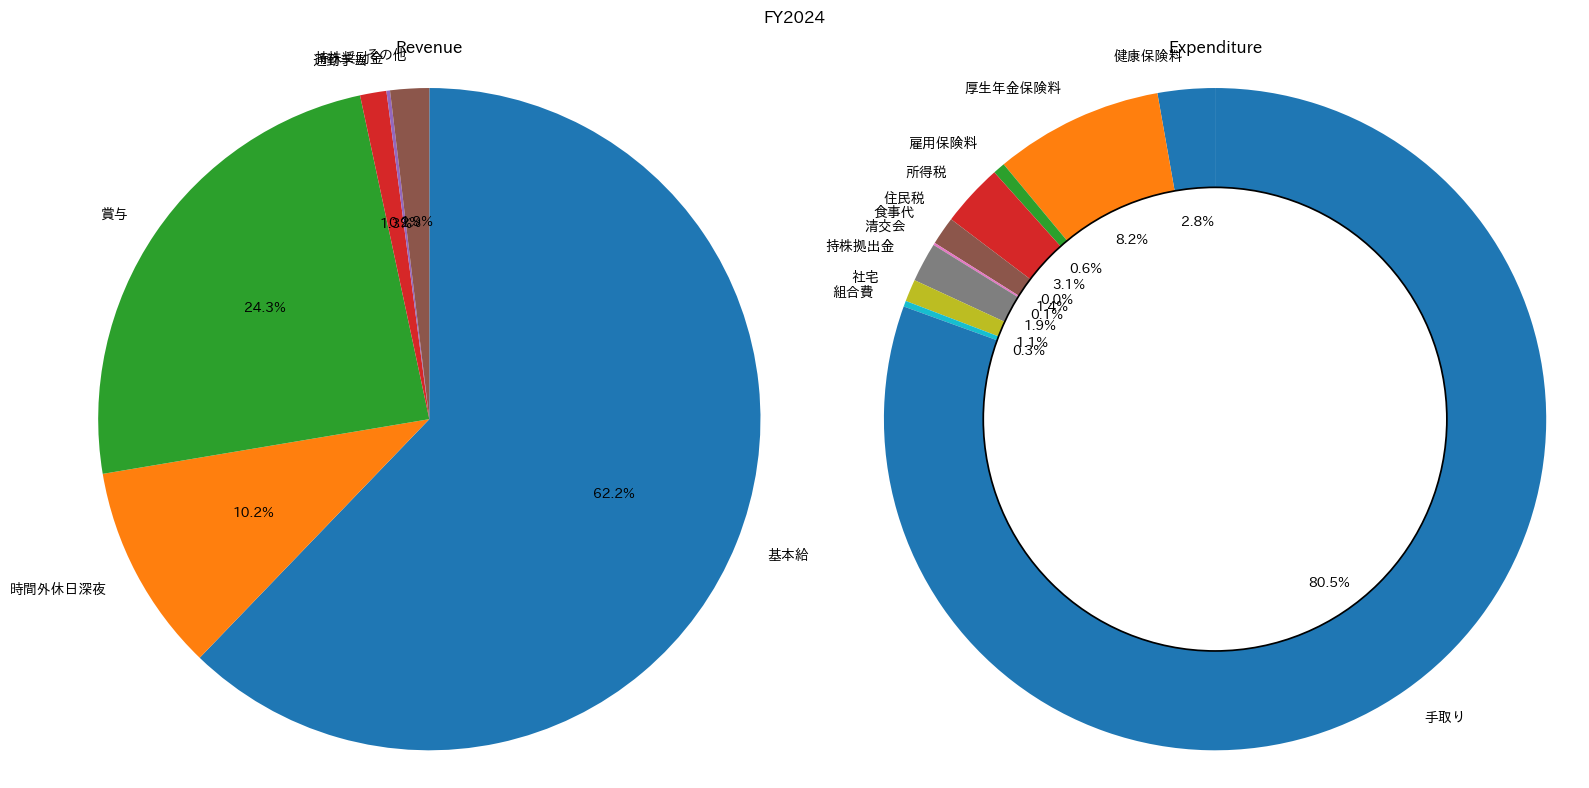

In [310]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(16, 8), tight_layout=True)
fig.suptitle("FY2024")

#歳入グラフ
axes[0].pie(yearly_data_revenue,
            labels=yearly_label_revenue,
            counterclock=False,
            startangle=90,
            autopct="%1.1f%%")
centre_circle = plt.Circle((0,0),
                            0.7,
                            color='black',
                            fc='white',
                            linewidth=1.25)
fig.gca().add_artist(centre_circle)
axes[0].axis('equal')
axes[0].set_title(f"Revenue")

#歳出グラフ
axes[1].pie(yearly_data_expenditure,
            labels=yearly_label_expenditure,
            counterclock=True,
            startangle=90,
            autopct="%1.1f%%")
centre_circle = plt.Circle((0,0),
                           0.7,
                           color='black',
                           fc='white',
                           linewidth=1.25)
fig.gca().add_artist(centre_circle)
axes[1].axis('equal')
axes[1].set_title(f"Expenditure")

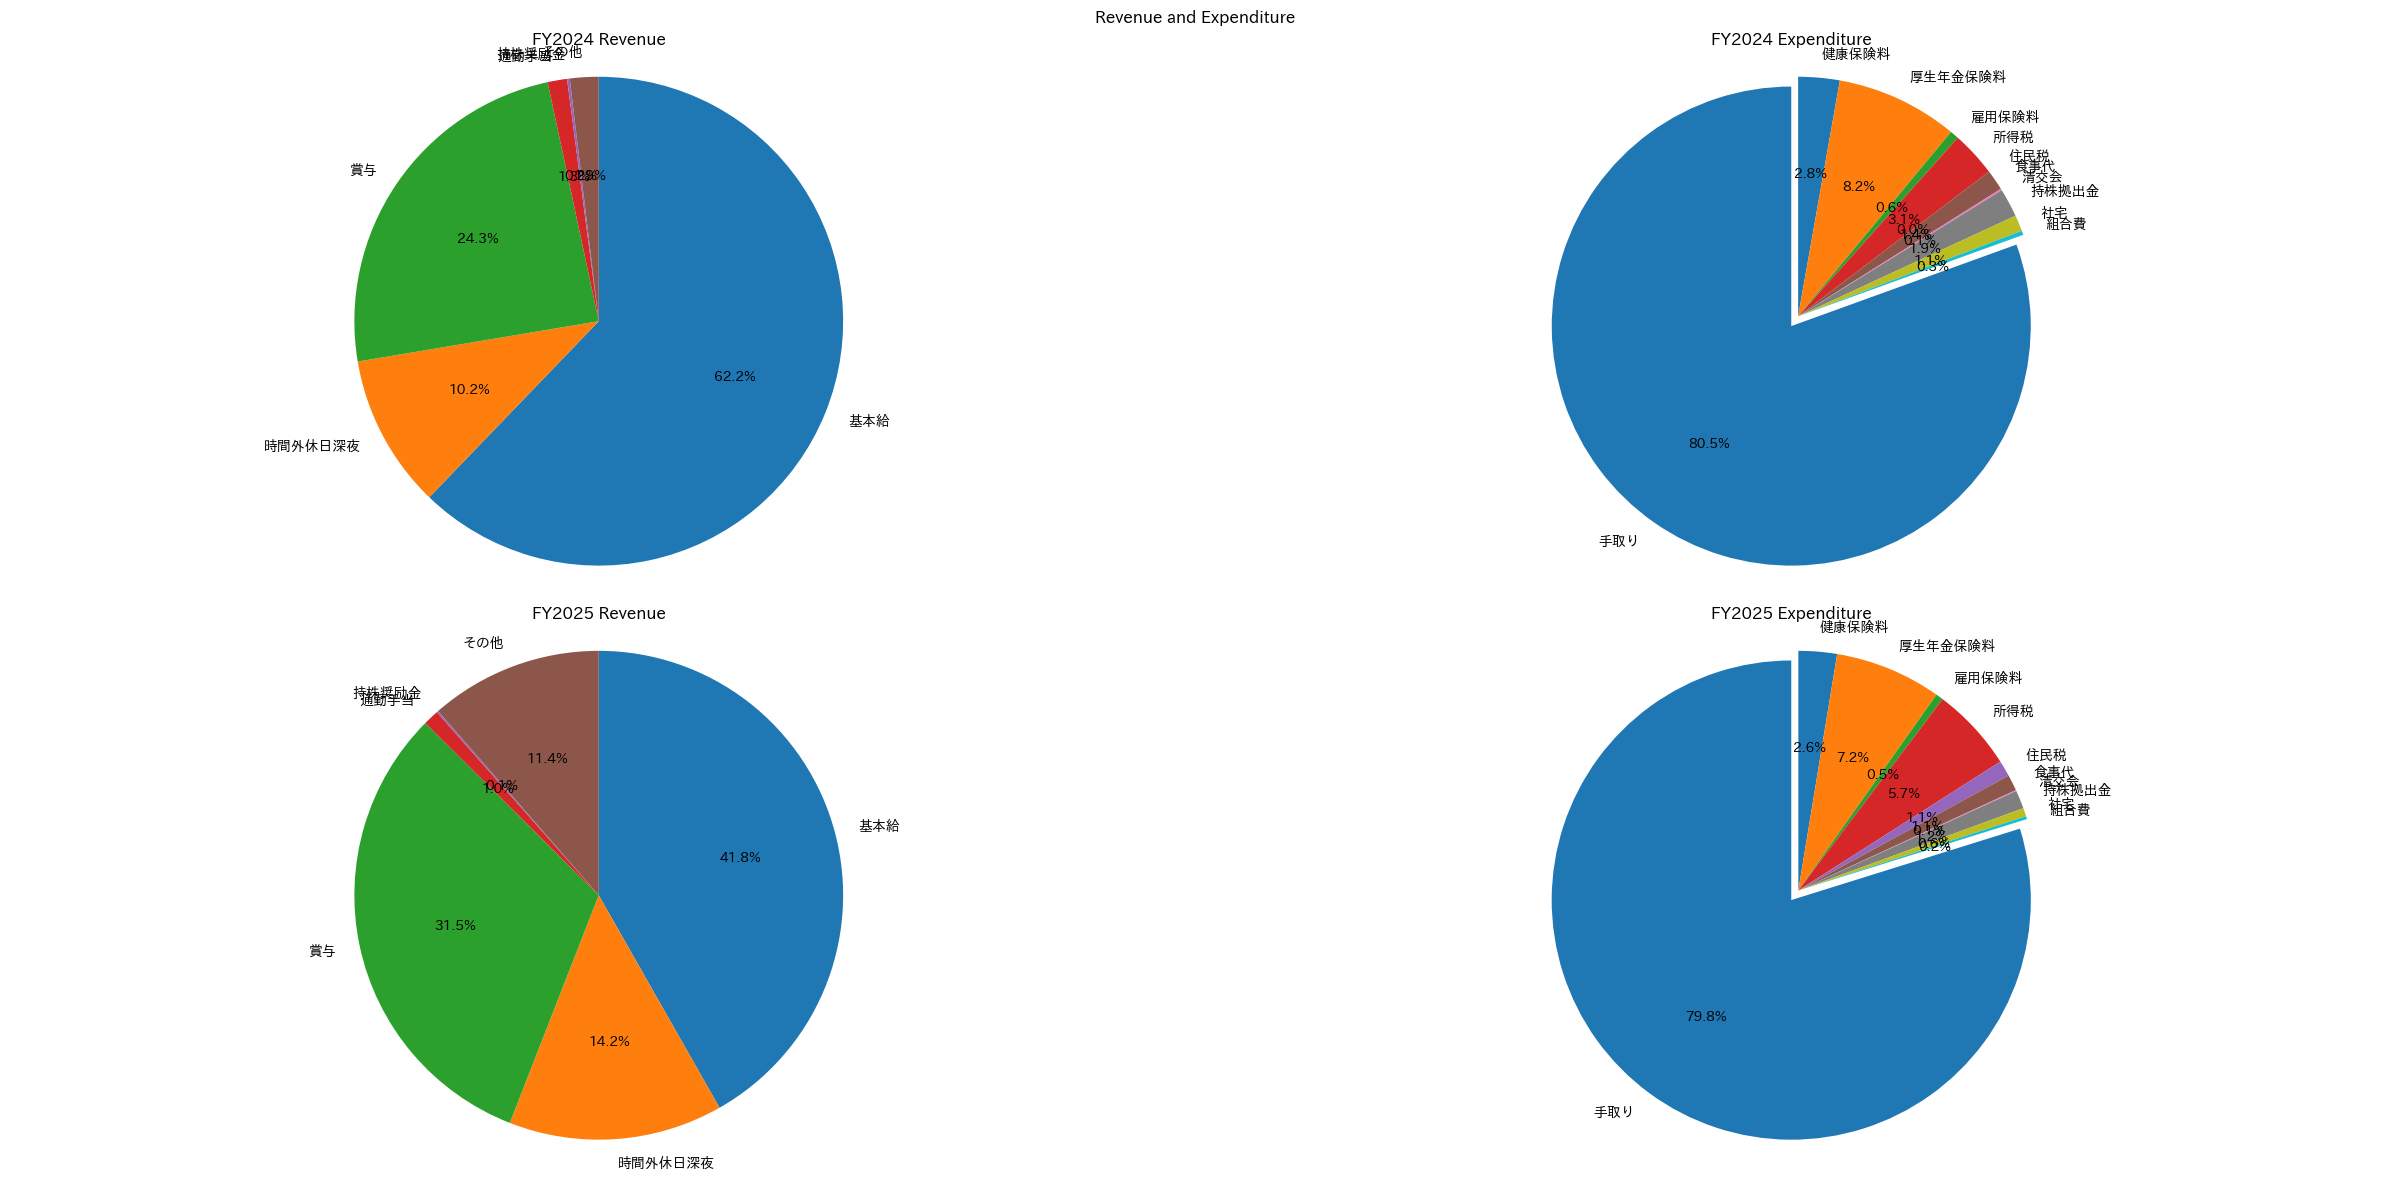

In [311]:
%matplotlib inline
fig, axes = plt.subplots(2, 2, figsize=(24, 12), tight_layout=True)
fig.suptitle("Revenue and Expenditure")

for i, FY in enumerate(master_key):
    #データ格納
    yearly_data_revenue = [e for e in dict_on_a_yearly_basis[FY].values.tolist()[2:8]]
    yearly_label_revenue = [e.replace("\n", "").replace("/", "") for e in dict_on_a_yearly_basis[FY].index.tolist()[2:8]]
    yearly_data_expenditure = [e for e in dict_on_a_yearly_basis[FY].values.tolist()[8:19]]
    yearly_label_expenditure = [e.replace("\n", "").replace("/", "") for e in dict_on_a_yearly_basis[FY].index.tolist()[8:19]]
    
    #歳入グラフ
    axes[i*1][0].pie(yearly_data_revenue,
                     labels=yearly_label_revenue,
                     counterclock=False,
                     startangle=90,
                     autopct="%1.1f%%")
    #centre_circle = plt.Circle((0,0),
    #                            0.7,
    #                            color='black',
    #                            fc='white',
    #                            linewidth=1.25)
    #fig.gca().add_artist(centre_circle)
    axes[i*1][0].axis('equal')
    axes[i*1][0].set_title(f"FY{FY} Revenue")
    
    #歳出グラフ
    axes[i*1][1].pie(yearly_data_expenditure,
                     labels=yearly_label_expenditure,
                     counterclock=False,
                     startangle=90,
                     autopct="%1.1f%%",
                     explode=[0.05 if i == len(yearly_label_expenditure)-1 else 0 for i in range(len(yearly_label_expenditure))])
    #centre_circle = plt.Circle((0,0),
    #                           0.7,
    #                           color='black',
    #                           fc='white',
    #                           linewidth=1.25)
    #fig.gca().add_artist(centre_circle)
    axes[i*1][1].axis('equal')
    axes[i*1][1].set_title(f"FY{FY} Expenditure")

In [312]:
yearly_label_revenue = [e.replace("\n", "").replace("/", "") for e in dict_on_a_yearly_basis[2024].index.tolist()[2:8]]
yearly_data_revenue = [e for e in dict_on_a_yearly_basis[2024].values.tolist()[2:8]]
print(yearly_label_revenue)
print(yearly_data_revenue)

['基本給', '時間外休日深夜', '賞与', '通勤手当', '持株奨励金', 'その他']
[3553803.0, 580748.0, 1387697.0, 73440.0, 10000.0, 108306.0]


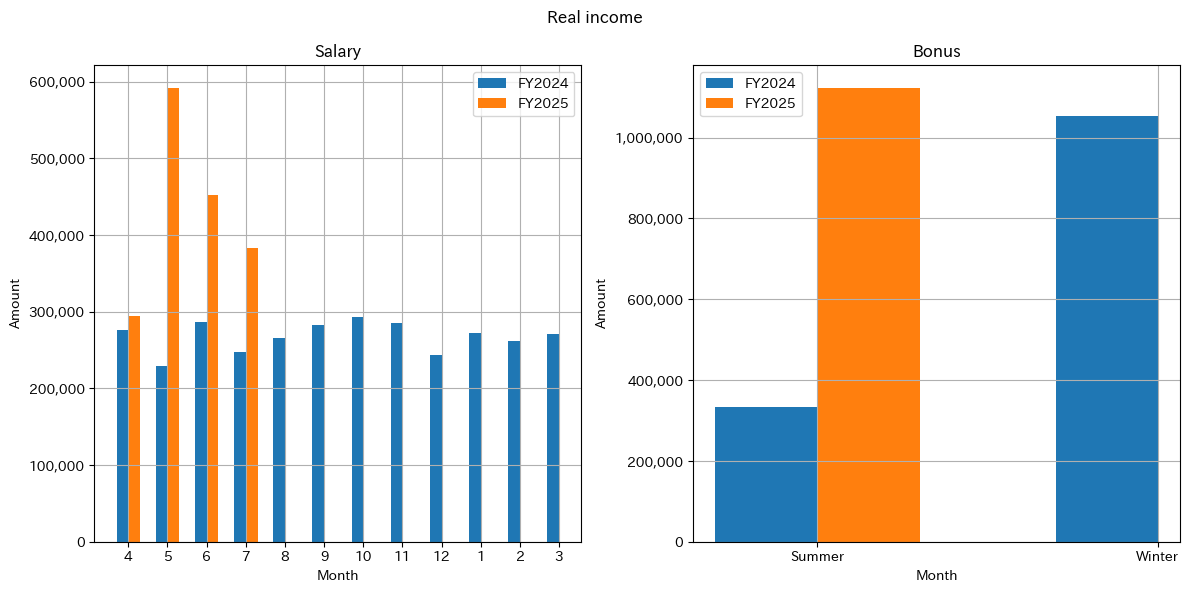

In [313]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
# 三桁カンマの設定
fig.suptitle("Real income")
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for wid, FY in enumerate(dict_on_a_monthly_basis.keys()):
    axes[0].bar(list(dict_on_a_monthly_basis[FY].keys()), 
                [series["手取り"] for month, series in dict_on_a_monthly_basis[FY].items()],
                label="FY"+str(FY),
                align="edge",
                width=-0.3+(wid)*0.6)
axes[0].set_ylabel("Amount")
axes[0].set_xlabel("Month")
axes[0].set_title("Salary")
axes[0].legend()
axes[0].grid()
#axes[0].title("a")("給与(残業/深夜込)の推移(月単位)")

axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for wid, FY in enumerate(dict_on_a_bonus_basis.keys()):
    axes[1].bar(np.arange(len(list(dict_on_a_bonus_basis[FY].values()))), 
                list(dict_on_a_bonus_basis[FY].values()), 
                label="FY"+str(FY),
                align="edge",
                width=-0.3+(wid)*0.6)
axes[1].set_xticks([0, 1]) 
axes[1].set_xticklabels(["Summer", "Winter"])
        #list(dict_on_a_bonus_basis[FY].keys()), list(dict_on_a_bonus_basis[FY].values()), label="FY"+str(FY))
axes[1].set_ylabel("Amount")
axes[1].set_xlabel("Month")
axes[1].set_title("Bonus")
axes[1].legend()
axes[1].grid()

In [346]:
dict_on_a_monthly_basis[FY]["6"]

所定外\n(前月)          56.82
法定外\n(前月)          39.82
基本給/\n賞与       313000.00
時間外/\n休日/深夜    157655.00
通勤手当                0.00
持株奨励金            1000.00
その他            104496.00
健康保険料           11220.00
厚生年金\n保険料       31110.00
雇用保険料            3122.00
所得税             33450.00
住民税             19400.00
食事代              7895.00
清交会               626.00
持株拠出金           11000.00
社宅               5000.00
組合費              1370.00
手取り            451958.00
Name: 17, dtype: float64

In [347]:
monthly_label_revenue = [e for e in dict_on_a_monthly_basis[2024]["7"].index.tolist()[2:7]]
monthly_label_revenue

['基本給/\n賞与', '時間外/\n休日/深夜', '通勤手当', '持株奨励金', 'その他']

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [255000. 255000. 273000. 273000. 273000. 273000. 273000. 273000. 273000.
 273000. 273000. 273000.]
[255000. 255000. 273000. 273000. 273000. 273000. 273000. 273000. 273000.
 273000. 273000. 273000.] [    0. 22450. 33176. 30091. 58778. 78812. 58057. 79373. 49965. 78452.
 66271. 25323.]
[255000. 277450. 306176. 303091. 331778. 351812. 331057. 352373. 322965.
 351452. 339271. 298323.] [36720.     0.     0.     0.     0.     0. 36720.     0.     0.     0.
     0.     0.]
[291720. 277450. 306176. 303091. 331778. 351812. 367777. 352373. 322965.
 351452. 339271. 298323.] [   0.    0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
[291720. 277450. 307176. 304091. 332778. 352812. 368777. 353373. 323965.
 352452. 340271. 299323.] [    0.  5160. 40020.     0.     0.     0.     0. 13126.     0.     0.
     0. 50000.]
[0. 0. 0. 0.] [273000. 273000. 313000. 313000.]
[273000. 273000. 313000. 313000.] [ 49082. 116563. 157655. 181019.]
[322082. 389563.

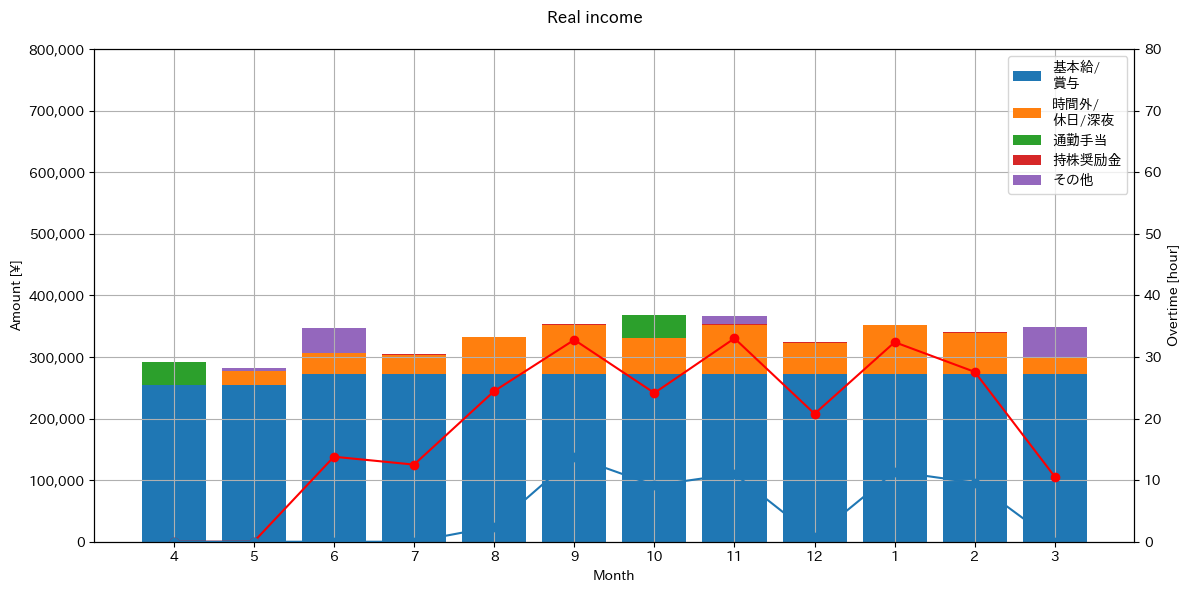

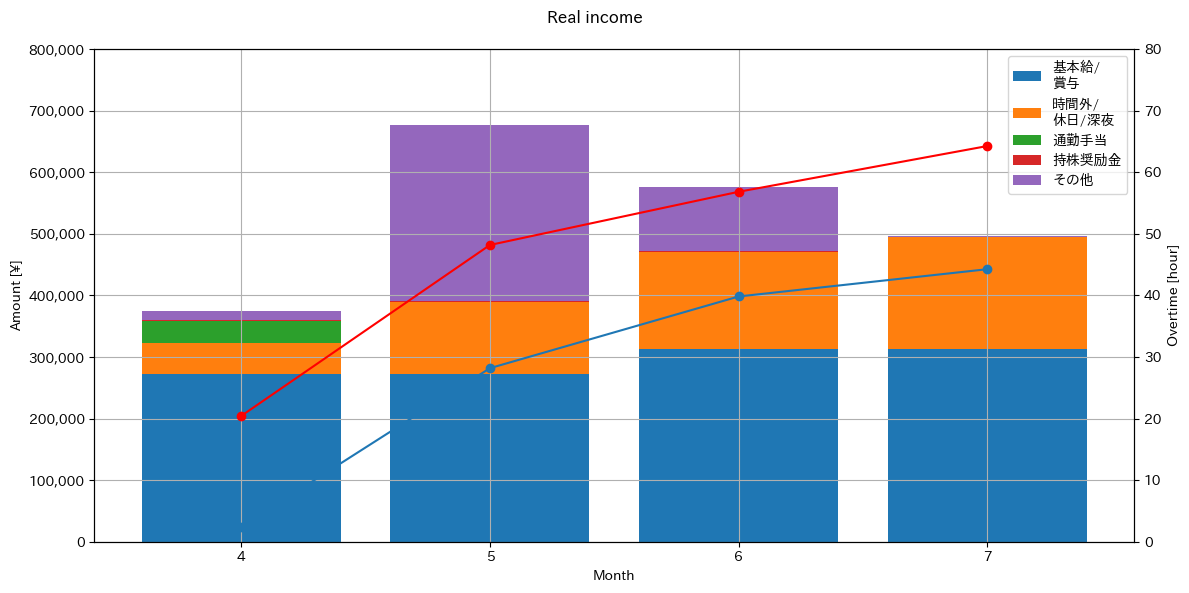

In [369]:
%matplotlib inline

for wid, FY in enumerate(dict_non_legal_overtime.keys()):
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 6), tight_layout=True)
    # 三桁カンマの設定
    fig.suptitle("Real income")
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    bottom = np.array([0.0 for i in range(len(dict_on_a_monthly_basis[FY]))])
    for key in monthly_label_revenue:
        values = np.array([series[key] for series in dict_on_a_monthly_basis[FY].values()])
        ax1.bar(list(dict_on_a_monthly_basis[FY].keys()),
                values,
                label=key,
                bottom=bottom)
        print(bottom, values)
        bottom += values
    ax1.legend()
    ax1.grid()
    ax1.set_ylim(0, 800000)
    ax1.set_ylabel("Amount [¥]")
    ax1.set_xlabel("Month")
        #ax2.bar(list(dict_on_a_monthly_basis[FY].keys()), 
        #        [series["手取り"] for month, series in dict_on_a_monthly_basis[FY].items()],
        #        bottom=dataset.iloc[:i].sum()
        #        label="FY"+str(FY))
    ax2 = ax1.twinx()
    ax2.plot(list(dict_non_legal_overtime[FY].keys()), 
            list(dict_non_legal_overtime[FY].values()),
            label="FY"+str(FY),
            marker="o",
            c="r")
    ax2.plot(list(dict_legal_overtime[FY].keys()), 
            list(dict_legal_overtime[FY].values()),
            label="FY"+str(FY),
            marker="o")
    ax2.set_ylim(0, 80)
    ax2.set_ylabel("Overtime [hour]")
ax.set_title("Salary")
ax.legend()
ax.grid()

In [286]:
FY = -1
dict_on_a_monthly_basis = {}
dict_on_a_bonus_basis = {}
dict_on_a_yearly_basis = {}
dict_non_legal_overtime = {}
dict_legal_overtime = {}
master_key = []
for index, row in data_df.iterrows():
    #現在の年度を格納
    if(row["年度"].isdigit()):
        FY = int(row["年度"])
        master_key.append(FY)
        dict_on_a_monthly_basis[FY] = {}
        dict_on_a_bonus_basis[FY] = {}
        dict_on_a_yearly_basis[FY] = {}
        dict_non_legal_overtime[FY] = {}
        dict_legal_overtime[FY] = {}
    if(row["月"].isdigit()):
        if(float(row["手取り"].replace(",", "").replace("¥", "")) != 0.0):
            dict_on_a_monthly_basis[FY][row["月"]] = row[2:20].apply(lambda x: float(x.replace(",", "").replace("¥", "")))
            dict_non_legal_overtime[FY][row["月"]] = float(row["所定外\n(前月)"].replace(",", "").replace("¥", ""))
            dict_legal_overtime[FY][row["月"]] = float(row["法定外\n(前月)"].replace(",", "").replace("¥", ""))
    else:
        real_income = float(row["手取り"].replace(",", "").replace("¥", ""))
        if("夏" in row["月"] and real_income != 0.0):
            dict_on_a_bonus_basis[FY]["6"] = real_income
        elif("冬" in row["月"] and real_income != 0.0):
            dict_on_a_bonus_basis[FY]["12"] = real_income
        elif("合計" in row["月"] and real_income != 0.0):
            #先頭の年度と月列を除外して、各値を変換
            dict_on_a_yearly_basis[FY] = row[2:20].apply(lambda x: float(x.replace(",", "").replace("¥", "")))
            #ボーナスを基本給/\n賞与から引いて、新しく賞与indexを追加
            sum_bonus = 0
            for k, v in dict_on_a_bonus_basis[FY].items():
                dict_on_a_yearly_basis[FY]
                sum_bonus += v
            dict_on_a_yearly_basis[FY]["基本給/\n賞与"] -= sum_bonus
            dict_on_a_yearly_basis[FY].rename({"基本給/\n賞与":"基本給"}, inplace=True)
            dict_on_a_yearly_basis[FY]["賞与"] = sum_bonus
            #インデックスの順序を変更
            dict_on_a_yearly_basis[FY] = dict_on_a_yearly_basis[FY].reindex(index=SORTED_INDEX)
            #print(dict_on_a_yearly_basis[2024])

In [287]:
dict_on_a_monthly_basis[2024]

{'4': 所定外\n(前月)           0.0
 法定外\n(前月)           0.0
 基本給/\n賞与       255000.0
 時間外/\n休日/深夜         0.0
 通勤手当            36720.0
 持株奨励金               0.0
 その他                 0.0
 健康保険料               0.0
 厚生年金\n保険料           0.0
 雇用保険料            1750.0
 所得税              6670.0
 住民税                 0.0
 食事代                 0.0
 清交会               510.0
 持株拠出金               0.0
 社宅               6935.0
 組合費                 0.0
 手取り            275855.0
 Name: 0, dtype: float64,
 '5': 所定外\n(前月)           0.0
 法定外\n(前月)           0.0
 基本給/\n賞与       255000.0
 時間外/\n休日/深夜     22450.0
 通勤手当                0.0
 持株奨励金               0.0
 その他              5160.0
 健康保険料            8680.0
 厚生年金\n保険料       25620.0
 雇用保険料            1664.0
 所得税              6250.0
 住民税                 0.0
 食事代              3132.0
 清交会               510.0
 持株拠出金               0.0
 社宅               6935.0
 組合費              1280.0
 手取り            228539.0
 Name: 1, dtype: float64,
 '6': 所定外\n(前月)          13.8
 法定外\n(前

In [254]:
dict_on_a_monthly_basis

{2024: {'4': 275855.0,
  '5': 228539.0,
  '6': 286381.0,
  '7': 247867.0,
  '8': 265502.0,
  '9': 282707.0,
  '10': 293588.0,
  '11': 284740.0,
  '12': 243986.0,
  '1': 272140.0,
  '2': 261230.0,
  '3': 271014.0},
 2025: {'4': 294339.0, '5': 591559.0, '6': 451958.0, '7': 383018.0}}

In [253]:
dict_on_a_yearly_basis

{2024: 所定外\n(前月)          252.41
 法定外\n(前月)           60.56
 基本給            3553803.00
 時間外/\n休日/深夜     580748.00
 賞与             1387697.00
 通勤手当             73440.00
 持株奨励金            10000.00
 その他             108306.00
 健康保険料           159371.00
 厚生年金\n保険料       470391.00
 雇用保険料            33791.00
 所得税             175498.00
 住民税                  0.00
 食事代              79022.00
 清交会               6480.00
 持株拠出金           110000.00
 社宅               61935.00
 組合費              16260.00
 手取り            4601246.00
 Name: 14, dtype: float64,
 2025: 所定外\n(前月)          241.98
 法定外\n(前月)          162.98
 基本給            1488272.00
 時間外/\n休日/深夜     504319.00
 賞与             1122828.00
 通勤手当             36720.00
 持株奨励金             4000.00
 その他             406628.00
 健康保険料            92367.00
 厚生年金\n保険料       256108.00
 雇用保険料            17869.00
 所得税             202502.00
 住民税              38500.00
 食事代              38325.00
 清交会               2344.00
 持株拠出金            44000.00
 社宅             